# Exercise 2

Work on this before the next lecture on 24 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2017/issues/3). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [139]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

Correlation between trees. This question is about investigating the correlation between decision trees and how this effects an ensemble constructed from them. There are three methods
for adding randomisation to the tree growing process:

1. grow each tree on a bootstrap sample
2. for each tree select a subset of features at random
3. pick the best random split point

You can use `RandomForestClassifier`, `BaggingClassifier`, and `ExtraTreesClassifier` to achieve various different sets of the above three strategies.

Show how the average amount of correlation between the trees in the ensemble varies as a function of bootstrap yes/no, number of `max_features`, and picking the best split point at random or not.

Pick one of the classification datasets from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

In [140]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
def get_correlation(clf,X_test):
    '''Function to calculate the correlation of ensemble tree classifiers such as RandomForestClassifier,ExtraTreesClassifier and BaggingClassifier'''
#    avg_list = []
#    for (ind,tree1) in enumerate(clf.estimators_):    
#        [avg_list.append(np.corrcoef(tree1.predict(X_test),tree2.predict(X_test))[0][1]) for tree2 in clf.estimators_[ind + 1:]]
    if isinstance(clf,BaggingClassifier):
        avg = sum(np.corrcoef(tree1.predict_proba(X_test[:,clf.estimators_features_[ind]]),tree2.predict_proba(X_test[:,clf.estimators_features_[ind + ind2 + 1]]))[0][1] for (ind,tree1) in enumerate(clf.estimators_) for (ind2,tree2) in enumerate(clf.estimators_[ind + 1:]))/int(len(clf.estimators_)*(len(clf.estimators_) - 1)/2)
    else:
        avg = sum(np.corrcoef(tree1.predict_proba(X_test),tree2.predict_proba(X_test))[0][1] for (ind,tree1) in enumerate(clf.estimators_) for tree2 in clf.estimators_[ind + 1:])/int(len(clf.estimators_)*(len(clf.estimators_) - 1)/2)
#    avg = reduce(lambda x,y: x+y, avg_list)/len(avg_list)
    return avg

I defined correlation as the correlation of assigned probabilities of each test sample label. It is seen that bootstraping in general lowers the correlation between the trees in the forest only for ExtraTreesClassifier.

In [141]:
X,y = load_digits(return_X_y=True)
#X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(bootstrap = True, n_estimators=40).fit(X_train,y_train)
clf2 = RandomForestClassifier(bootstrap = False, n_estimators=40).fit(X_train,y_train)
#print(clf.estimators_[0])
clf3 = BaggingClassifier(bootstrap=True, n_estimators=40).fit(X_train,y_train)
clf4 = BaggingClassifier(bootstrap=False, n_estimators=40).fit(X_train,y_train)
clf5 = ExtraTreesClassifier(bootstrap=True, n_estimators=40).fit(X_train,y_train)
clf6 = ExtraTreesClassifier(bootstrap=False, n_estimators=40).fit(X_train,y_train)
print('For Random Forests, Average Correlation with bootstrap is %f' % get_correlation(clf,X_test))
print('For Random Forests, Average Correlation without bootstrap is %f' % get_correlation(clf2,X_test))
print('For Bagging Forests, Average Correlation with bootstrap is %f' % get_correlation(clf3,X_test))
print('For Bagging Forests, Average Correlation without bootstrap is %f' % get_correlation(clf4,X_test))
print('For Extra Forests, Average Correlation with bootstrap is %f' % get_correlation(clf5,X_test))
print('For Extra Forests, Average Correlation without bootstrap is %f' % get_correlation(clf6,X_test))

For Random Forests, Average Correlation with bootstrap is -0.071225
For Random Forests, Average Correlation without bootstrap is -0.111111
For Bagging Forests, Average Correlation with bootstrap is -0.111111
For Bagging Forests, Average Correlation without bootstrap is -0.111111
For Extra Forests, Average Correlation with bootstrap is -0.111111
For Extra Forests, Average Correlation without bootstrap is -0.111111


In [142]:
#I could have also used  GridsearchCV for finding the best parameters
random_forest_list = [RandomForestClassifier(bootstrap=True, n_estimators=40,max_features=x).fit(X_train,y_train) for x in range(1,65,5)]
bag_forest_list = [BaggingClassifier(bootstrap=True,n_estimators=40,max_features=x).fit(X_train,y_train) for x in range(1,65,5)]
extra_forest_list = [ExtraTreesClassifier(bootstrap=True, n_estimators=40,max_features=x).fit(X_train,y_train) for x in range(1,65,5)]
random_avg_corr_list_max_features = [get_correlation(x,X_test) for x in random_forest_list]
bag_avg_corr_list_max_features = [get_correlation(x,X_test) for x in bag_forest_list]
extra_avg_corr_list_max_features = [get_correlation(x,X_test) for x in extra_forest_list]
random_score_list_max_features = [x.score(X_test,y_test) for x in random_forest_list]
bag_score_list_max_features = [x.score(X_test,y_test) for x in bag_forest_list]
extra_score_list_max_features = [x.score(X_test,y_test) for x in extra_forest_list]


It is evident that ExtraTreesClassifier performs better for max_features > 30, where it has the highest accuracy. In terms of correlation, we see that all of the methods behave similarly for max_features > ~20. 

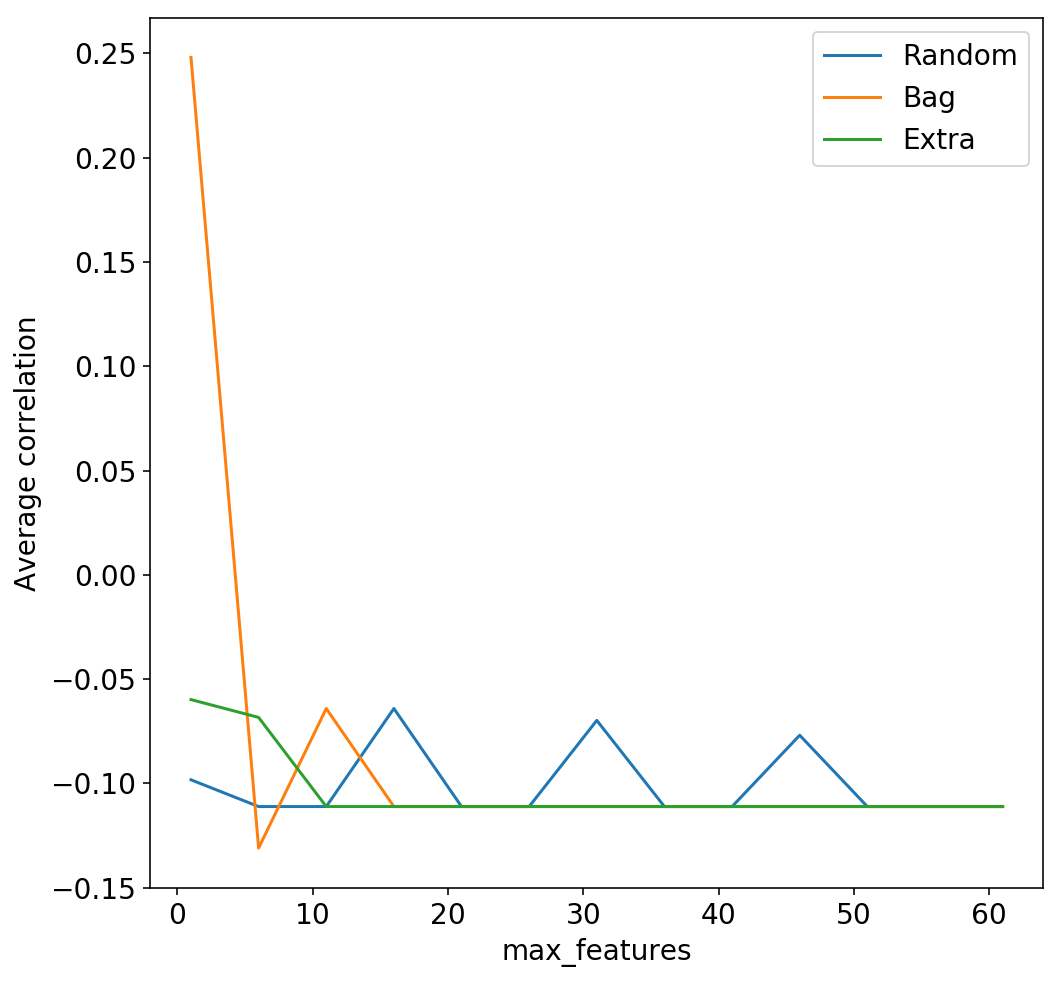

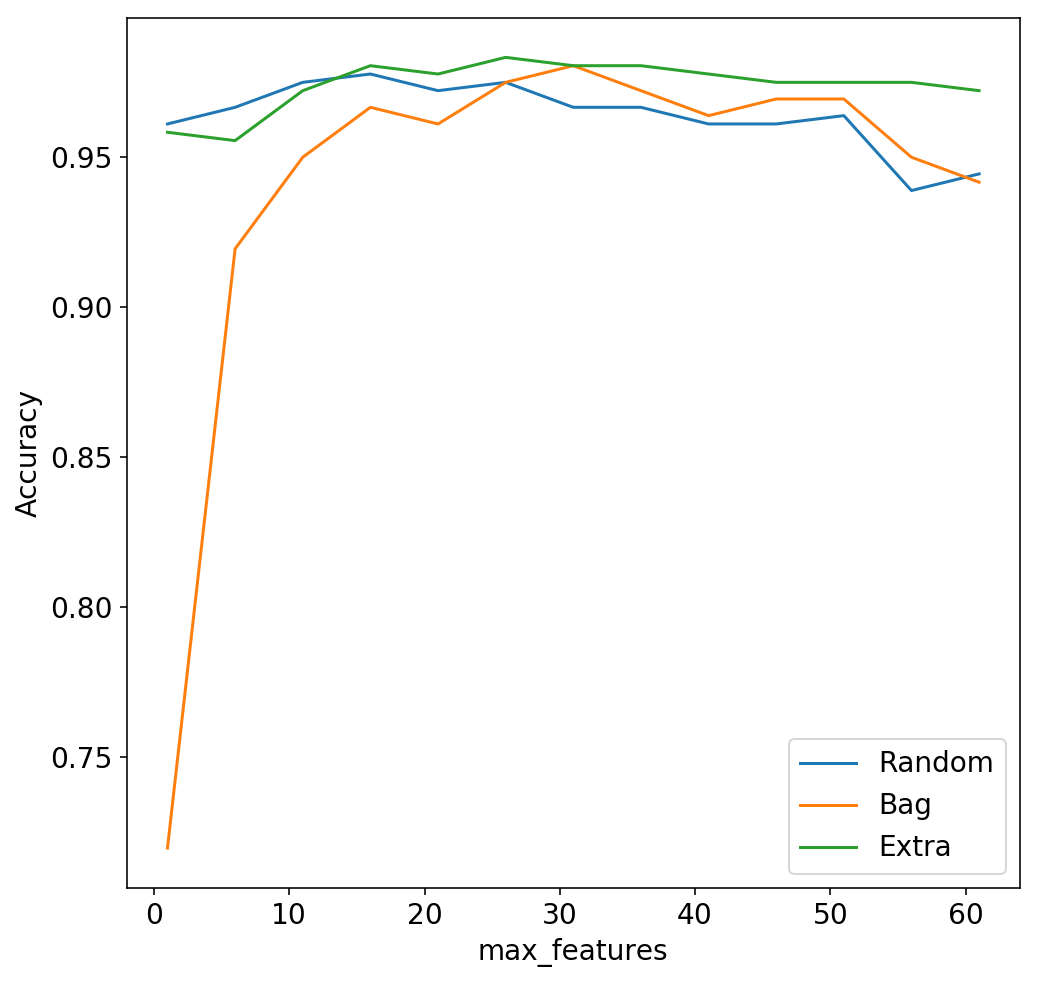

In [143]:
plt.plot(range(1,65,5), random_avg_corr_list_max_features)
plt.plot(range(1,65,5), bag_avg_corr_list_max_features)
plt.plot(range(1,65,5), extra_avg_corr_list_max_features)
plt.xlabel('max_features')
plt.ylabel('Average correlation')
plt.legend(['Random','Bag','Extra'])
plt.figure()
plt.plot(range(1,65,5), random_score_list_max_features)
plt.plot(range(1,65,5), bag_score_list_max_features)
plt.plot(range(1,65,5), extra_score_list_max_features)
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend(['Random','Bag','Extra'])

---

## Question 2

Compare the feature importances calculated by a `RandomForestClassifier`, `ExtraTreesClassifier` and `GradientBoostedTreesClassifier` on the digits dataset. You might have to tune `n_estimators` to get good performance. Which parts of the images is the most important and do you agree with the interpretation of the classifiers? (Bonus) Do the importances change if you change to problem to be a classification problem of odd vs even digit?

You can load the data set with: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

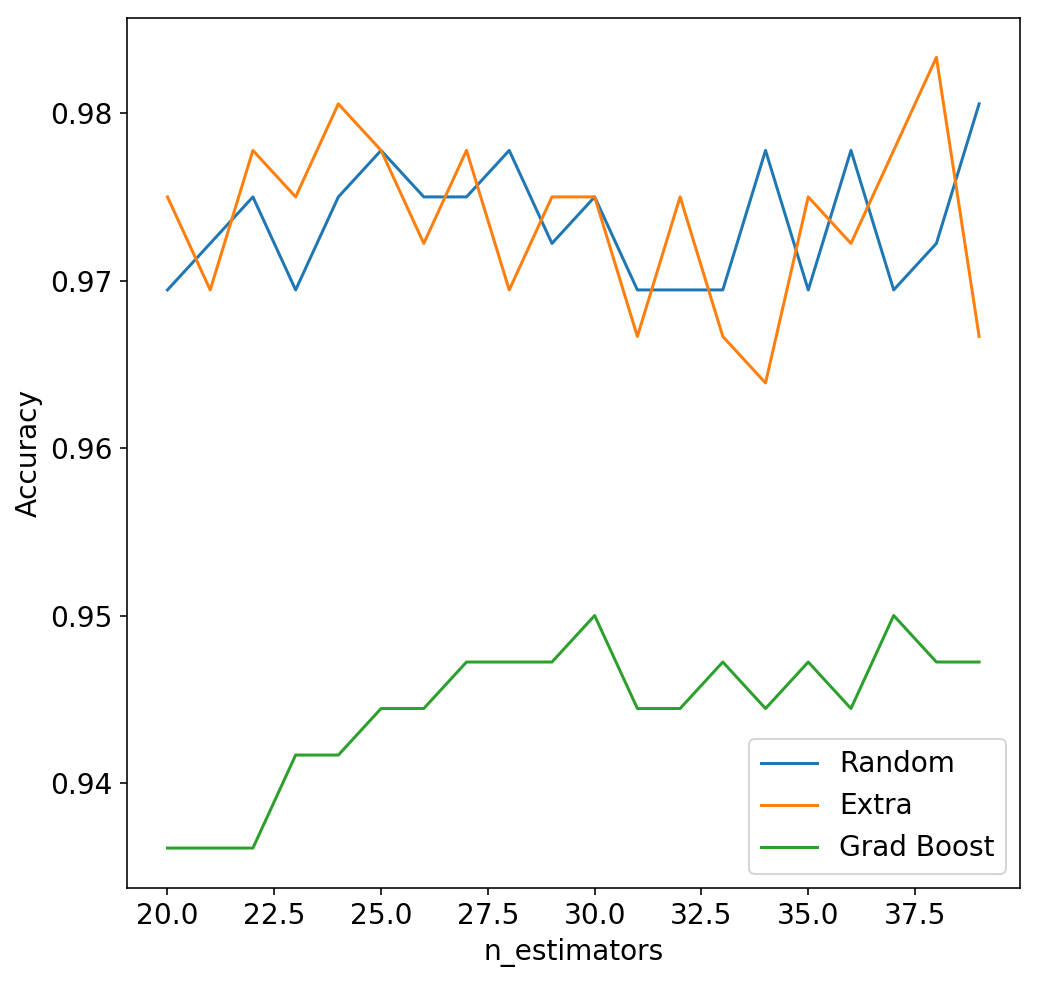

In [129]:
# your answer
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report
X,y = load_digits(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#clf = RandomForestClassifier(bootstrap = True, n_estimators=20).fit(X_train,y_train)
#clf2 = ExtraTreesClassifier(bootstrap = True, n_estimators=20).fit(X_train,y_train)
#clf3 = GradientBoostingClassifier(bootstrap = True, n_estimators=20).fit(X_train,y_train)
random_forest_list = [RandomForestClassifier(bootstrap=True, n_estimators=x).fit(X_train,y_train) for x in range(20,40)]
extra_forest_list = [ExtraTreesClassifier(bootstrap=True, n_estimators=x).fit(X_train,y_train) for x in range(20,40)]
gradboost_forest_list = [GradientBoostingClassifier(n_estimators=x).fit(X_train,y_train) for x in range(20,40)]
random_score_list_n_estimators = [x.score(X_test,y_test) for x in random_forest_list]
extra_score_list_n_estimators = [x.score(X_test,y_test) for x in extra_forest_list]
gradboost_score_list_n_estimators = [x.score(X_test,y_test) for x in gradboost_forest_list]
random_importances_list_n_estimators = [x.feature_importances_ for x in random_forest_list]
extra_importances_list_n_estimators = [x.feature_importances_ for x in extra_forest_list]
gradboost_importances_list_n_estimators = [x.feature_importances_ for x in gradboost_forest_list]
plt.plot(range(20,40), random_score_list_n_estimators)
plt.plot(range(20,40), extra_score_list_n_estimators)
plt.plot(range(20,40), gradboost_score_list_n_estimators)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['Random','Extra','Grad Boost'])

The plot above indicates that RandomForestClassifier and ExtraTreesClassifiers perform slightly better than the GradientBoostingClassifier.

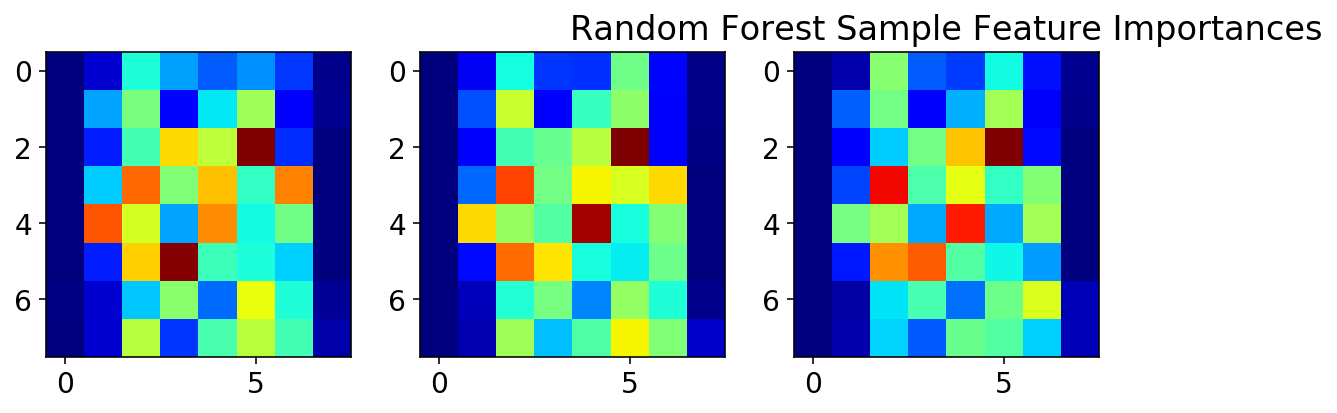

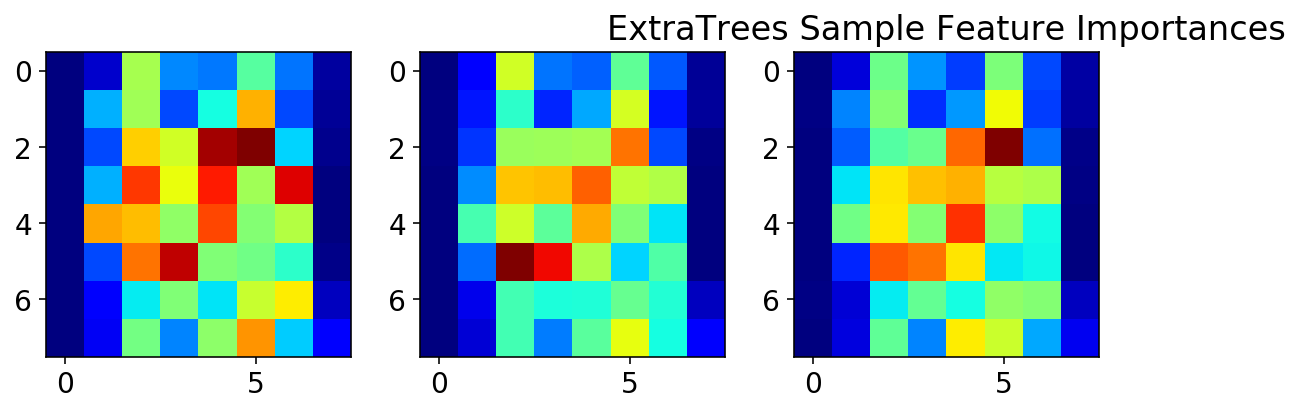

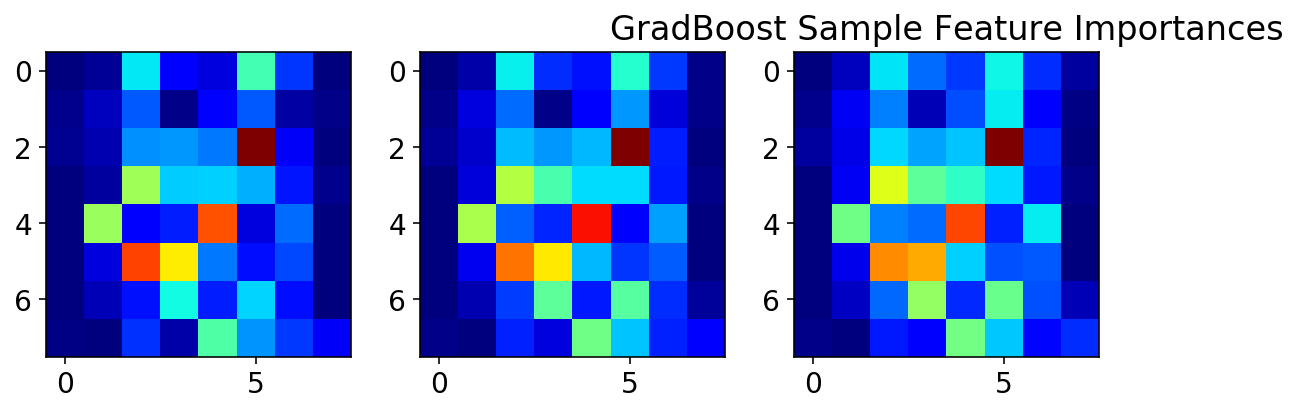

In [130]:
fig = plt.figure()
for (ind,rand) in enumerate(random_importances_list_n_estimators[::7]):
    Z = rand.reshape((8,-1))
    plt.subplot(1,3,ind+1)
    plt.imshow(Z,cmap=plt.cm.jet)
    #plt.colorbar()
plt.tight_layout()
plt.title('Random Forest Sample Feature Importances')
    

fig = plt.figure()
for (ind,rand) in enumerate(extra_importances_list_n_estimators[::7]):
    Z = rand.reshape((8,-1))
    plt.subplot(1,3,ind+1)
    plt.imshow(Z,cmap=plt.cm.jet)
    #plt.colorbar()
plt.tight_layout()
plt.title('ExtraTrees Sample Feature Importances')

fig = plt.figure()
for (ind,rand) in enumerate(gradboost_importances_list_n_estimators[::7]):
    Z = rand.reshape((8,-1))
    plt.subplot(1,3,ind+1)
    plt.imshow(Z,cmap=plt.cm.jet)
    #plt.colorbar()
plt.tight_layout()
plt.title('GradBoost Sample Feature Importances')
plt.figure()


The feature importance plots show that center pixel have more importance than those on the edges. This is expected as the digit information is mostly contained in the center pixels.


In [123]:

print('Accuracy for RandomForest: %f ' % random_score_list_n_estimators[9])
print('Classification Report for RandomForest:')
print(classification_report(y_test, random_forest_list[9].predict(X_test))) #test for false positives and negatives...
print('Accuracy for ExtraTree: %f ' % extra_score_list_n_estimators[9])
print('Classification Report for ExtraTree:')
print(classification_report(y_test, extra_forest_list[9].predict(X_test))) #test for false positives and negatives...
print('Accuracy for GradBoost: %f ' % gradboost_score_list_n_estimators[9])
print('Classification Report for GradBoost:')
print(classification_report(y_test, gradboost_forest_list[9].predict(X_test))) #test for false positives and negatives...



Accuracy for RandomForest: 0.966667 
Classification Report for RandomForest:
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        33
          1       0.93      1.00      0.97        28
          2       0.97      1.00      0.99        33
          3       0.97      0.97      0.97        34
          4       0.96      0.98      0.97        46
          5       0.96      0.98      0.97        47
          6       0.97      0.97      0.97        35
          7       0.97      0.97      0.97        34
          8       1.00      0.90      0.95        30
          9       0.97      0.93      0.95        40

avg / total       0.97      0.97      0.97       360

Accuracy for ExtraTree: 0.977778 
Classification Report for ExtraTree:
             precision    recall  f1-score   support

          0       0.97      1.00      0.99        33
          1       0.93      1.00      0.97        28
          2       1.00      1.00      1.00        33


A further assessment can be made by looking at the classifiation reports (above), which lists the precision (false positives) and recall (false negatives) values as well as the accuracy. It is seen that the classifiers are 'balanced' in the sense that they provide similar (high) precision and recall values without drastically favoring any one of them.

In [124]:
y_train = y_train % 2 #only odd or even numbers!
y_test = y_test % 2
random_forest_list[9].fit(X_train,y_train)
extra_forest_list[9].fit(X_train,y_train)
gradboost_forest_list[9].fit(X_train,y_train)
print('###### ODD or EVEN ######')
print('Accuracy for RandomForest: %f ' % random_forest_list[9].score(X_test,y_test))
print('Classification Report for RandomForest:')
print(classification_report(y_test, random_forest_list[9].predict(X_test))) #test for false positives and negatives...
print('Accuracy for ExtraTree: %f ' % extra_forest_list[9].score(X_test,y_test))
print('Classification Report for ExtraTree:')
print(classification_report(y_test, extra_forest_list[9].predict(X_test))) #test for false positives and negatives...
print('Accuracy for GradBoost: %f ' % gradboost_forest_list[9].score(X_test,y_test))
print('Classification Report for GradBoost:')
print(classification_report(y_test, gradboost_forest_list[9].predict(X_test))) #test for false positives and negatives...


###### ODD or EVEN ######
Accuracy for RandomForest: 0.991667 
Classification Report for RandomForest:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       177
          1       0.99      0.99      0.99       183

avg / total       0.99      0.99      0.99       360

Accuracy for ExtraTree: 0.983333 
Classification Report for ExtraTree:
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       177
          1       0.97      0.99      0.98       183

avg / total       0.98      0.98      0.98       360

Accuracy for GradBoost: 0.952778 
Classification Report for GradBoost:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95       177
          1       0.95      0.96      0.95       183

avg / total       0.95      0.95      0.95       360



The performance is increased when we check for odd or even digits, as we now have a two-class classification problem, hence mis-classification probability is much lower.

---

## Question 3

This is a regression problem. Use a gradient boosted tree regressor (tune the `max_depth`, `learning_rate` and `n_estimators` parameters) to study the importance of the different features as well as the partial dependence of the output on individual features as well as pairs of features.

* can you identify uninformative features?
* how do the interactions between the features show up in the partial dependence plots?

(Help: `rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
` seems to work quite well)
(Help: to produce 1D and 2D partial dependence plots pass `[0,1, (0,1)]` as the `features` argument of `plot_partial_dependence`. More details in the function's documentation.)


In [125]:
from sklearn.ensemble import GradientBoostingRegressor


def make_data(n_samples=800, n_features=8, noise=0.2, random_state=2):
    generator = check_random_state(random_state)

    X = generator.rand(n_samples, n_features)
    y = 10 * (X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 \
        + 10 * X[:, 3] + 10 * X[:, 4] + noise * generator.randn(n_samples)

    return X, y

X,y = make_data()

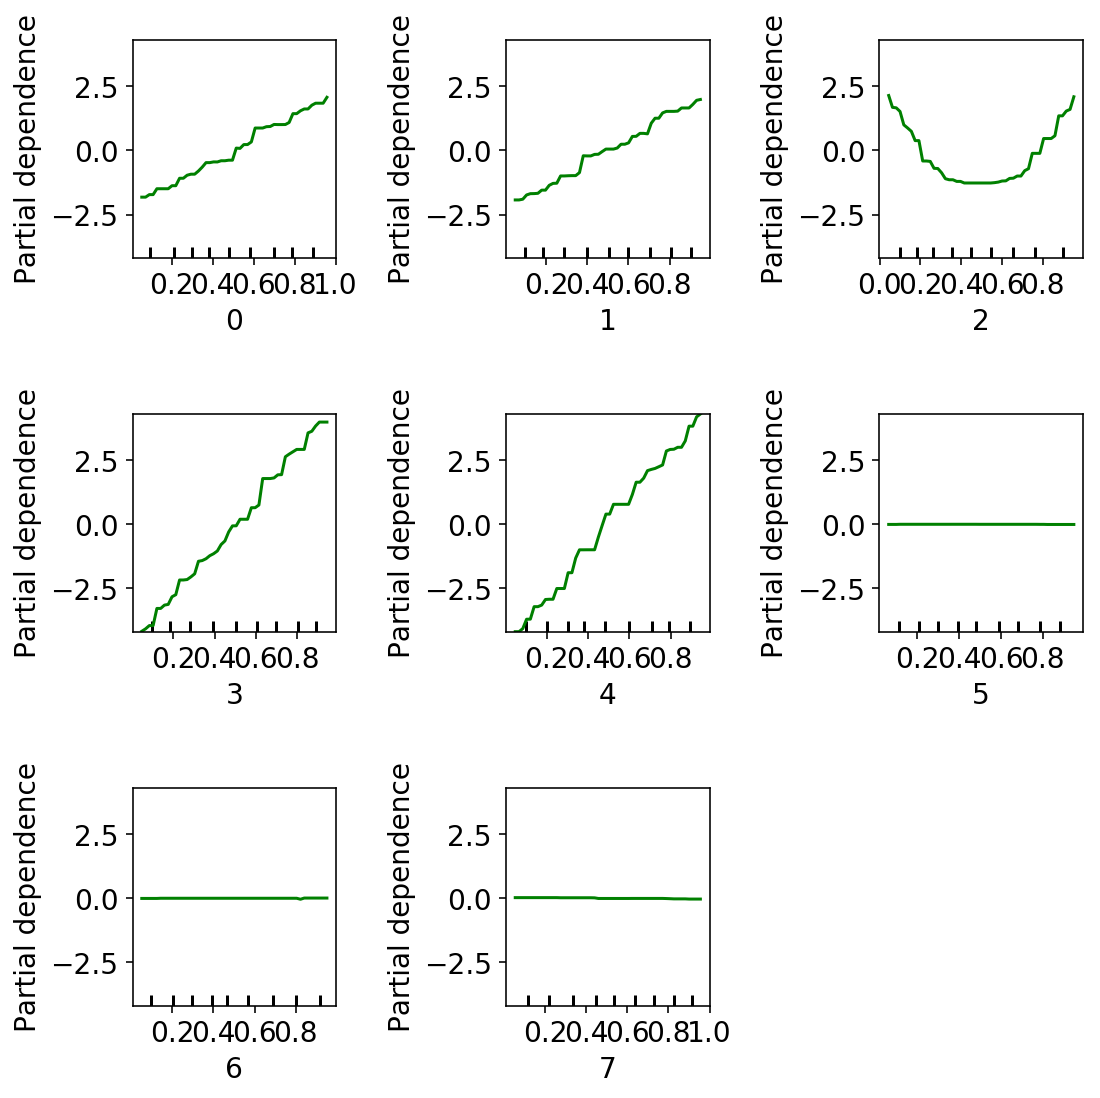

In [126]:
# your solution
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rgr = GradientBoostingRegressor(n_estimators=200, max_depth=2, learning_rate=0.1)
rgr.fit(X_train,y_train)
rgr.feature_importances_.argmax()
fig, axs = plot_partial_dependence(rgr, X_train,list(range(0,8)), n_jobs=3, grid_resolution=50)
plt.tight_layout()
plt.show() 

The partial dependence plots clearly show that the features 5-->7 are uninformative. The features to which the output is linearly dependent ie., 0,1,3,4 themselves show a linear behavior in partial dependence plots. The feature that has a quadratic dependence ie., 2 exhibits a x^2 like behavior.

---

## (Bonus) Question 4

House prices in California. Use a gradient boosted regression tree model to build a model that can predict house prices in California (`GradientBoostingRegressor` is your friend).

Plot each of the features as a scatter plot with the target to learn about each variable. You can also make a plot of two features and use the target as colour.

Fit a model and tune the model complexity using a training and test data set.

Explore the feature importances and partial dependences that are important to the house price.

In [127]:
from sklearn.datasets.california_housing import fetch_california_housing

cal_housing = fetch_california_housing()

# if the above doesn't work, download `cal_housing_py3.pkl` from the GitHub repository
# and adjust the path to the downloaded file which is passed to `load()`
# uncomment the following lines
#from sklearn.externals.joblib import load
#d = load('/home/username/Downloads/cal_housing_py3.pkz')
#X, y = d[:,1:], d[:,0]/100000
#X[:, 2] /= X[:, 5]
#X[:, 3] /= X[:, 5]
#X[:, 5] = X[:, 4] / X[:, 5]

Accuracy : 0.828636
###Feature Importances###
MedInc : 0.152941874829 
 HouseAge : 0.0682685333595 
 AveRooms : 0.12894590166 
 AveBedrms : 0.0764940351564 
 Population : 0.0770191544465 
 AveOccup : 0.154894542965 
 Latitude : 0.160811229696 
 Longitude : 0.180624727888 



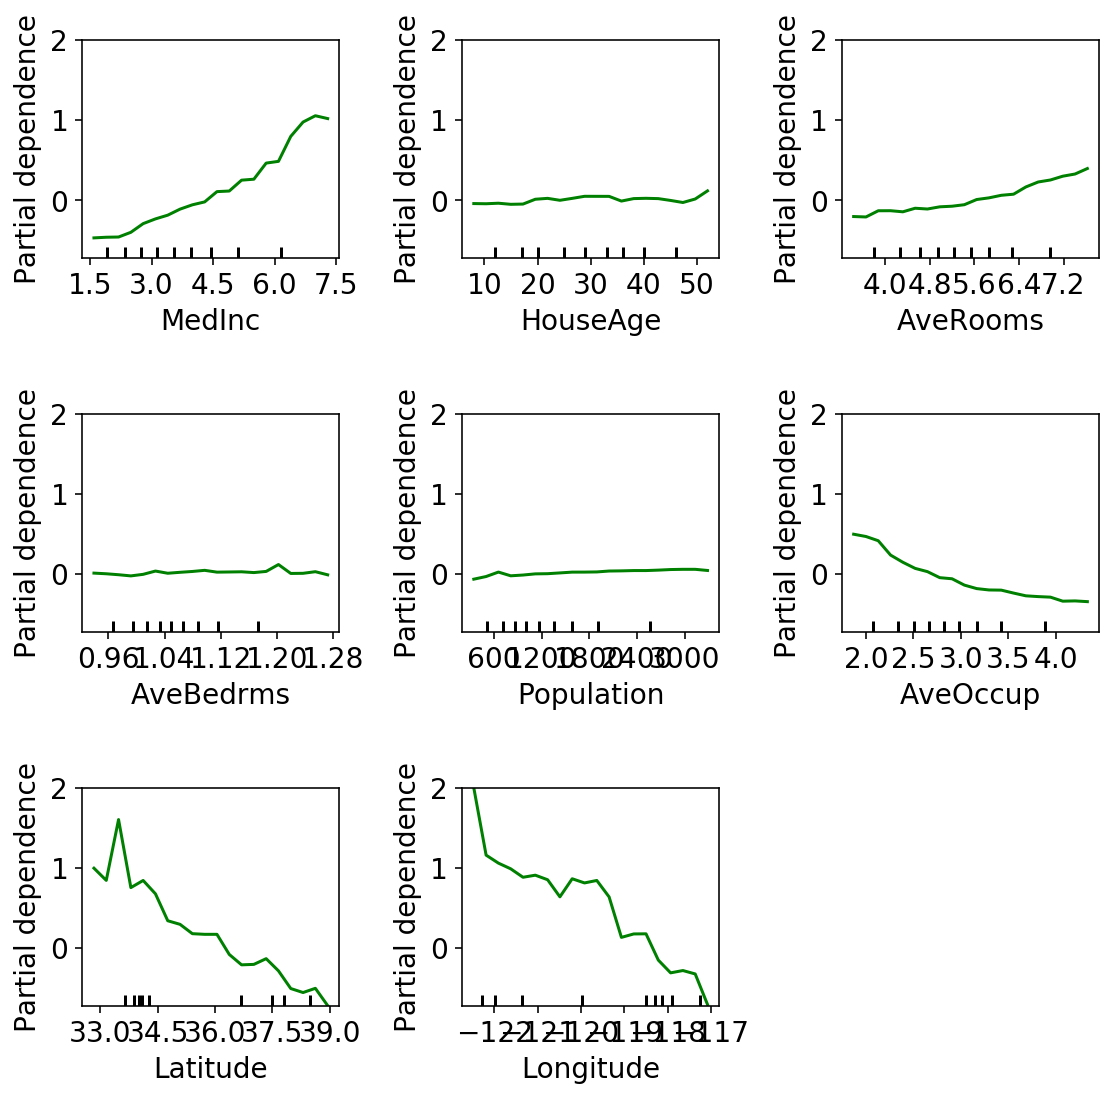

In [128]:
# your solution
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X,y = cal_housing['data'], cal_housing['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rgr = GradientBoostingRegressor(n_estimators=400, max_depth=3, learning_rate=0.3)
#clf = RandomForestRegressor(n_estimators=400, max_depth=3, bootstrap = True)
rgr.fit(X_train,y_train)
#clf.fit(X_train,y_train)
print('Accuracy : %f' % rgr.score(X_test,y_test))
#print(clf.score(X_test,y_test))
#print(rgr.feature_importances_)
fig, axs = plot_partial_dependence(rgr, X_train,list(range(0,X.shape[1])), n_jobs=3, grid_resolution=20, feature_names=cal_housing['feature_names'])
plt.tight_layout()
print('###Feature Importances###')
print(*(' '.join([str(x[0]),':',str(x[1]),'\n']) for x in zip(cal_housing['feature_names'],rgr.feature_importances_)))
#print(cal_housing.DESCR)
plt.show() 

It is evident from both the feature importances and the partial dependence plots that the important features are the location (longitude, latitude), average occupation and median income, whereas the population and the number of bedrooms have a lesser impact.